<a href="https://colab.research.google.com/github/CoolAstroWiz/PHYS3025Work/blob/main/PHYS_3025_HW_1_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

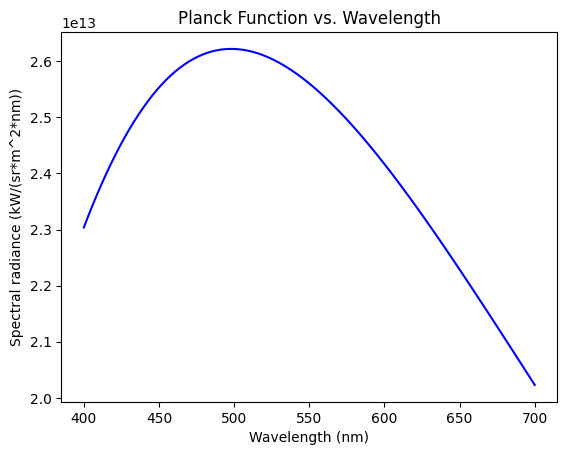

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
h = 6.626e-34
m_e = 9.109e-31
k_b = 1.381e-23
T = 5780
c = 3.0e+8

def f(x):
    return 2*h*c**2/((x*1e-9)**5*np.exp(h*c/(k_b*(x*1e-9)*T)))


x = np.linspace(400,700,100)
y = f(x)
fig, ax = plt.subplots()

ax.plot(x, y, label ='Planck Funtion(wavelength)')
ax.set_title('Planck Function vs. Wavelength')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectral radiance (kW/(sr*m^2*nm))')
plt.show()








 Plx   e_Plx    SpType     Vmag  B-V  
 mas    mas                mag   mag  
------ ----- ------------ ----- ------
  2.26  0.36          B8V  6.61 -0.019
  4.01  0.35        G8III  6.53  0.955
  7.34  0.35        K2III  6.18  1.032
 25.77  0.49           G0  7.05  0.520
  5.32  0.32 A0IIspSiSrHg  6.36 -0.047
  3.57  0.49           K2  6.90  1.446
  5.50  0.48     G6/8 III  5.71  0.911
  5.01  0.45     G7II-III  6.22  0.970
  6.01  0.32       M2 III  5.53  1.615
 15.02  0.18        K3III  4.78  1.254
   ...   ...          ...   ...    ...
  2.29  0.43        B5III  6.55 -0.093
  1.61  0.41        B6IVe  6.53 -0.126
 10.05  0.49         F2IV  7.26  0.353
 11.35  0.33        K0III  5.13  1.121
  0.72  0.43         B2IV  4.88 -0.071
 11.19  0.46          A7V  6.78  0.215
 31.26  0.15          F4V  4.03  0.419
  4.42  0.36       K5 III  5.59  1.599
  5.56  0.36           A2  6.75  0.081
  8.74  0.18          B8V  4.49 -0.075
Length = 12918 rows


Text(0, 0.5, 'Mv')

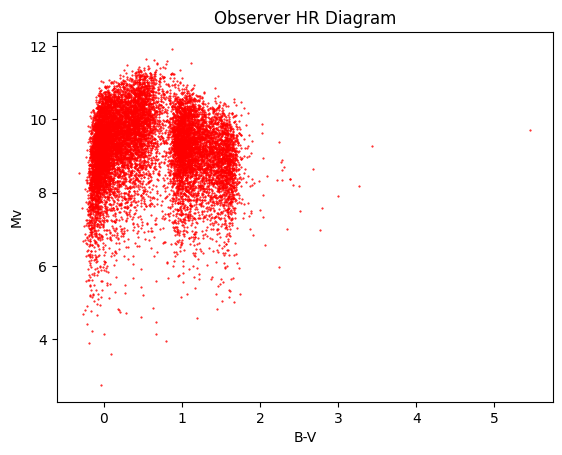

In [ ]:
from astropy.table import Table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import numpy as np

#Collection and refinement of relevant data
v = Vizier(columns = ['Plx','e_Plx','SpType','Vmag','B-V'], column_filters={"Vmag":"!=","Plx":"!=","e_Plx":"!=","SpType":"!=","B-V":"!=",},row_limit=-1)  # Collecting appropriate data from Vizier
result = v.query_constraints(catalog="V/137D",e_Plx='<0.5',Plx='>0') # Creating result array/table with constraints to -->
                                                                     # ignore more than 5% plx error and remove negative plx entries
data = result[result.keys()[0]].pprint()

# Object for each data type, allows for calculations
Plx = result[0]['Plx'].data.data
ePlx = result[0]['e_Plx'].data.data
SType = result[0]['SpType'].data.data
Vmag = result[0]['Vmag'].data.data
BV = result[0]['B-V'].data.data
Mv = Vmag + 5 - np.log10(1/(Plx*1e-3)) #Distance modulus to determine absolute magnitude (also conversion of units to arcs)

# Plotting section
fig, ax = plt.subplots()
ax.scatter(BV,Mv,s=0.25,c='r') #Scatter plot with small modifications to allow clearer dots
ax.set_title('Observer HR Diagram')
ax.set_xlabel('B-V')
ax.set_ylabel('Mv')








If I were to consider making a Luminosity vs Temperature plot, I would make considerations to converting the data I currently have collected into both of these quantities. To get Luminosity from Vmag, I would have to use the distance modulus (using parallax) and calculate the absolute magnitude of the stars. This would be comparable to luminosity and be able to show an accurate relationship to temperature. As for temperature (Teff), I could actually import a tool from PyAstronomy that has already created 2 different functions to convert directly from B-V to Teff. While there are small differences between the two this would be an acceptable way to plot the relationship between luminosity and temperature. Additionally, I could always pull the data from Vizier, but thats not quite as fun.